In [6]:
pip install nsepython

    Index Name INDEX_NAME HistoricalDate  ...      HIGH       LOW     CLOSE
0     Nifty 50   NIFTY 50    25 Nov 2021  ...  17564.35  17351.70  17536.25
1     Nifty 50   NIFTY 50    24 Nov 2021  ...  17600.60  17354.00  17415.05
2     Nifty 50   NIFTY 50    23 Nov 2021  ...  17553.70  17216.10  17503.35
3     Nifty 50   NIFTY 50    22 Nov 2021  ...  17805.25  17280.45  17416.55
4     Nifty 50   NIFTY 50    18 Nov 2021  ...  17945.60  17688.50  17764.80
..         ...        ...            ...  ...       ...       ...       ...
421   Nifty 50   NIFTY 50    31 Oct 2019  ...  11945.00  11855.10  11877.00
422   Nifty 50   NIFTY 50    30 Oct 2019  ...  11883.95  11784.45  11844.00
423   Nifty 50   Nifty 50    23 Sep 2019  ...  11694.85  11471.35  11600.00
424   Nifty 50   Nifty 50    20 Sep 2019  ...   11381.9     10691  11274.00
425   Nifty 50   Nifty 50    31 Jul 2019  ...   11145.3   10999.4  11118.00

[426 rows x 7 columns]

States Matrix: 
 state       Downward  Stagnant  Upward
priorst

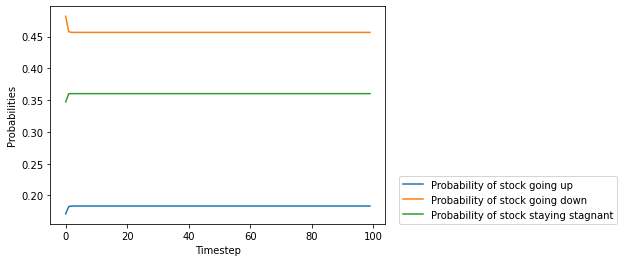

In [7]:
from nsepython import *
import numpy as np
import matplotlib.pyplot as plt


symbol = "NIFTY 50"
days = 1000
endDate = datetime.datetime.now().strftime("%d-%b-%Y")
endDate = str(endDate)

startDate = (datetime.datetime.now()- datetime.timedelta(days=days)).strftime("%d-%b-%Y")
startDate = str(startDate)

df=index_history("NIFTY 50",startDate,endDate)
print(df)

df["state"]=df["CLOSE"].astype(float).pct_change()
df['state']=df['state'].apply(lambda x: 'Downward' if (x < -0.001) else 'Upward' if (x > 0.001) else "Stagnant")
df.tail()

df['priorstate']=df['state'].shift(1)
df.tail()

states = df [['priorstate','state']].dropna()
statesMatrix = states.groupby(['priorstate','state']).size().unstack().fillna(0)
print("\nStates Matrix: \n",statesMatrix)

TransitionMatrix = statesMatrix.apply(lambda x: x/float(x.sum()),axis=1)
print("\nTransition Matrix: \n",TransitionMatrix)

mpd = [1, 0, 0]
probOfUp = []
probOfDown = []
probOfStag = []

for i in range(0, 100):
    print(mpd)
    mpd = np.dot(mpd, TransitionMatrix)
    probOfDown.append(mpd[0])
    probOfUp.append(mpd[1])
    probOfStag.append(mpd[2])

plt.plot(probOfUp, label="Probability of stock going up")
plt.plot(probOfDown, label="Probability of stock going down")
plt.plot(probOfStag, label="Probability of stock staying stagnant")
plt.xlabel('Timestep')
plt.ylabel('Probabilities')
plt.legend(loc=(1.04,0))

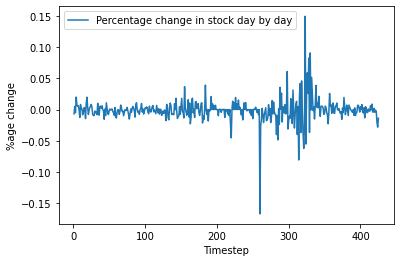

In [8]:
plt.plot(df["CLOSE"].astype(float).pct_change(), label="Percentage change in stock day by day")
plt.xlabel('Timestep')
plt.ylabel('%age change')
plt.legend(loc="upper left")